# **Projet TP3 - Analyse du marché de l'emploi Canadien (Source Jobillico)**

# Ratissage des données

In [ ]:
!pip install beautifulsoup4 requests html5lib

**!!Ne pas executer la cellule suivantes pour éviter de recommencer le scraping qui prend un certain temps!!**

---



Les données ont été stockées dans un fichier csv 'jobs.csv' et a été utilisé pour la suite des analyses.

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

JOBS_DATA = []

def get_soup(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
        'Accept-Language': 'en-US, en;q=0.5'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return BeautifulSoup(response.content, "html.parser")
    return None

def extract_links(soup):
    links = []
    titles = soup.find_all('h2', class_='h3 pr4')
    for title in titles:
        link = title.find('a')
        if link:
            links.append('https://www.jobillico.com/' + link.get('href'))
    return links

for i in range(0, 700):
    url = f"https://www.jobillico.com/search-jobs?skwd=&scty=&icty=0&ipc=0&sil=&sjdpl=&sdl=&imc1=0&imc2=0&flat=0&flng=0&mfil=40&ipg=1&clr={i}"
    main_soup = get_soup(url)

    if main_soup:
        job_links = extract_links(main_soup)

        for job_link in job_links:
            #print(job_link)
            job_soup = get_soup(job_link)

            if job_soup:
              #Extraction des donnees
              #Titre
              title = job_soup.find('h1', class_ = 'h1 my0').text.strip()

              #Compagnie
              company = job_soup.find('h2', class_ = 'h3 link mt1 mb0').text.strip()

              #Ville et Region
              ville_region_a = job_soup.find('a', class_='sm link').text.strip()

              ville_region = ville_region_a.split(",")
              if len(ville_region) >= 2:
                 region = ville_region[-1].strip()
                 ville = ville_region[-2].strip()
              else:
                 region = ""
                 ville = ""

              #Salaires de base et salaire maximum possible
              salary_span = job_soup.find('span', class_='job-infos-label-new is-hidden job-infos-label-new is-hidden-salary')
              salary = salary_span.find_next_sibling().text.strip() if salary_span else None

              if salary == "To be discussed":
                 salaire_de_base = ""
                 salaire_max = ""
              else:
                  part_salary = salary.split(" to ")
                  salaire_de_base = part_salary[0].strip().replace("$ per hour", "").strip()

                  if len(part_salary) > 1:  # Check if there is a second part
                      salaire_max = part_salary[1].split("$")[0].strip()
                  else:
                      salaire_max = ""

              # Heures par semaine et type d'emplois
              heure_et_emplois_span = job_soup.find('span', class_='icon icon--information icon--information--clock')
              heure_et_emplois = heure_et_emplois_span.find_next_sibling().text.strip() if heure_et_emplois_span else None

              if heure_et_emplois:
                  # Heures
                  heure_par_semaine = heure_et_emplois.split("h - ")[0]
                  if 'to' in heure_par_semaine:
                      heure_par_semaine = heure_par_semaine.split("to  ")[1]
                  # Type emplois
                  split_result = heure_et_emplois.split("h - ")
                  type_emplois = split_result[1] if len(split_result) > 1 else ""
              else:
                  heure_par_semaine = ""
                  type_emplois = ""

              #Type de contrat
              contrat_span = job_soup.find('span', class_='icon icon--information icon--information--curve')
              contrat = contrat_span.find_next_sibling().text.strip() if contrat_span else None


              JOBS_DATA.append([title, company, ville, region, heure_par_semaine, type_emplois, salaire_de_base, salaire_max, contrat])
df = pd.DataFrame(JOBS_DATA, columns=['Titres', 'Compagnies', 'Villes', 'Regions','Heures', 'Type Emplois', 'Salaires', 'Salaires Max Possibles', 'Contrats'])

In [ ]:
df

,Titres,Compagnies,Villes,Regions,Heures,Type Emplois,Salaires,Salaires Max Possibles,Contrats
0,Préposé en maintenance de bâtiments,Village Vacances Valcartier,Saint-Gabriel-de-Valcartier,QC,40.0,"Full time , Part time",22.25,25.00,"Casual , Permanent , Seasonal job"
1,Chargé de projet,Barrière QMB,Laval,QC,40.00,Full time,,,"Permanent , Telecommuting job"
2,Dessinateur 2D en structure d'acier,Lainco inc.,Terrebonne,QC,37.5,Full time,,,"Permanent , Telecommuting job"
3,Machiniste mouliste,DSD International inc.,Thetford-Mines,QC,40,Full time,,,Permanent job
4,Opérateur.trice d'équipements lourds (paveuse),Les Entreprises Michaudville inc.,Montreal,QC,45,Full time,,,Permanent job
...,...,...,...,...,...,...,...,...,...
9795,Mécanicien de machineries lourdes,Entreprises G.N.P. inc.,Victoriaville,QC,40.00,Full time,,,Permanent job
9796,Assistant(e) aux projets,LES ENTREPRISES GÉNÉREUX,Saint-Jean-de-Matha,QC,40.0,Full time,,,Permanent job
9797,Technicien électronique,Les Services Electro-Techno Inc.,Sherbrooke,QC,40.00,Full time,,,Permanent job
9798,Préposé aux glissades,Village Vacances Valcartier,Saint-Gabriel-de-Valcartier,QC,40.00,Full time,,,Seasonal job


In [ ]:
from google.colab import files
df.to_csv('jobs.csv')
files.download('jobs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Import du fichier csv 'jobs.csv'

In [55]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

jobs = pd.read_csv('/content/drive/My Drive/TP3-8100/jobs.csv', encoding='utf-8')
jobs = jobs.drop('Unnamed: 0', axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Partie 1 – Nettoyage et exploration des données :**









In [56]:
jobs

,Titres,Compagnies,Villes,Regions,Heures,Type Emplois,Salaires,Salaires Max Possibles,Contrats
0,Préposé en maintenance de bâtiments,Village Vacances Valcartier,Saint-Gabriel-de-Valcartier,QC,40.0,"Full time , Part time",22.25,25.0,"Casual , Permanent , Seasonal job"
1,Chargé de projet,Barrière QMB,Laval,QC,40.00,Full time,NaN,NaN,"Permanent , Telecommuting job"
2,Dessinateur 2D en structure d'acier,Lainco inc.,Terrebonne,QC,37.5,Full time,NaN,NaN,"Permanent , Telecommuting job"
3,Machiniste mouliste,DSD International inc.,Thetford-Mines,QC,40,Full time,NaN,NaN,Permanent job
4,Opérateur.trice d'équipements lourds (paveuse),Les Entreprises Michaudville inc.,Montreal,QC,45,Full time,NaN,NaN,Permanent job
...,...,...,...,...,...,...,...,...,...
9795,Mécanicien de machineries lourdes,Entreprises G.N.P. inc.,Victoriaville,QC,40.00,Full time,NaN,NaN,Permanent job
9796,Assistant(e) aux projets,LES ENTREPRISES GÉNÉREUX,Saint-Jean-de-Matha,QC,40.0,Full time,NaN,NaN,Permanent job
9797,Technicien électronique,Les Services Electro-Techno Inc.,Sherbrooke,QC,40.00,Full time,NaN,NaN,Permanent job
9798,Préposé aux glissades,Village Vacances Valcartier,Saint-Gabriel-de-Valcartier,QC,40.00,Full time,NaN,NaN,Seasonal job


In [57]:
#1- Compter le nombre de valeur manquantes dans toutes les céllules du jeu de données
valeurs_manquantes = jobs.isna().sum()
print("Le nombre de valeurs manquantes : ", valeurs_manquantes)

Le nombre de valeurs manquantes :  Titres                       0
Compagnies                   0
Villes                       0
Regions                      0
Heures                       0
Type Emplois              1084
Salaires                  7631
Salaires Max Possibles    7808
Contrats                     0
dtype: int64


In [58]:
#2- Convertir les colonnes heures, Salaires et Salaires Max en float
import pandas as pd
import numpy as np

def to_float(val):
    try:
        return float(val)
    except ValueError:
        return np.nan

# Appliquer la fonction to_float à la colonne 'Heures'
jobs['Heures'] = jobs['Heures'].apply(to_float)

# Remplacer les valeurs NaN par 0
jobs['Heures'] = jobs['Heures'].fillna(0)

#Colonnes salaires et salaires max
jobs['Salaires'] = jobs['Salaires'].replace('', np.nan)
jobs['Salaires Max Possibles'] = jobs['Salaires Max Possibles'].replace('', np.nan)

# Convertion en float et remplissage NaN avec 0
jobs['Salaires'] = jobs['Salaires'].astype(float).fillna(0)
jobs['Salaires Max Possibles'] = jobs['Salaires Max Possibles'].astype(float).fillna(0)
jobs

,Titres,Compagnies,Villes,Regions,Heures,Type Emplois,Salaires,Salaires Max Possibles,Contrats
0,Préposé en maintenance de bâtiments,Village Vacances Valcartier,Saint-Gabriel-de-Valcartier,QC,40.0,"Full time , Part time",22.25,25.0,"Casual , Permanent , Seasonal job"
1,Chargé de projet,Barrière QMB,Laval,QC,40.0,Full time,0.00,0.0,"Permanent , Telecommuting job"
2,Dessinateur 2D en structure d'acier,Lainco inc.,Terrebonne,QC,37.5,Full time,0.00,0.0,"Permanent , Telecommuting job"
3,Machiniste mouliste,DSD International inc.,Thetford-Mines,QC,40.0,Full time,0.00,0.0,Permanent job
4,Opérateur.trice d'équipements lourds (paveuse),Les Entreprises Michaudville inc.,Montreal,QC,45.0,Full time,0.00,0.0,Permanent job
...,...,...,...,...,...,...,...,...,...
9795,Mécanicien de machineries lourdes,Entreprises G.N.P. inc.,Victoriaville,QC,40.0,Full time,0.00,0.0,Permanent job
9796,Assistant(e) aux projets,LES ENTREPRISES GÉNÉREUX,Saint-Jean-de-Matha,QC,40.0,Full time,0.00,0.0,Permanent job
9797,Technicien électronique,Les Services Electro-Techno Inc.,Sherbrooke,QC,40.0,Full time,0.00,0.0,Permanent job
9798,Préposé aux glissades,Village Vacances Valcartier,Saint-Gabriel-de-Valcartier,QC,40.0,Full time,0.00,0.0,Seasonal job


In [59]:
#3- Supprimer les valeures aberantes dans les colonnes 'Salaires' et 'Salaires Max Possibles'
# Dans cette partie on supprime les salaires répresentant les salaires annuels et on garde les salaires par heures
# Dans notre jeu de données pour ne pas biaisé nos analyses futures
limites_salaires = 1000
jobs = jobs[jobs['Salaires'] < limites_salaires]

jobs.shape

(9054, 9)

In [ ]:
#4- Supprimer les valeurs nulles et dupliquées du jeu des données
#Ici je vous présente les suppressions de valeures nulles et dupliquées meme si en réalité je l'ai garde pour mes futures analyses
#jobs = jobs.drop_duplicates()
#jobs = jobs.dropna()
#jobs

# **Partie 2 – Analyse et visualisation des données :**

In [60]:
# 1. Faites une analyse descriptive des salaires
salaires_descriptives = jobs[['Salaires', 'Salaires Max Possibles']].describe()
print(salaires_descriptives)

          Salaires  Salaires Max Possibles
count  9054.000000             9054.000000
mean      3.985020                4.129663
std       9.350014               10.458614
min       0.000000                0.000000
25%       0.000000                0.000000
50%       0.000000                0.000000
75%       0.000000                0.000000
max      35.690000               39.860000


In [61]:
# 2. Comparer la moyenne des heures de travail par région du Canada
heures_travail = jobs.groupby(['Type Emplois', 'Regions'])['Heures'].mean()
print(heures_travail)

Type Emplois            Regions
 Full time              ON         37.500000
                        QC         40.466351
 Full time , Part time  QC         40.000000
Name: Heures, dtype: float64


In [62]:
# 3. Donner les types de contrats les plus fréquents par région au Canada
contrats_frequents = jobs.groupby('Regions')['Contrats'].value_counts()
print(contrats_frequents)

Regions  Contrats                                      
AB       Contract , Permanent , Seasonal  job                50
BC       Permanent  job                                      47
ON       Permanent  job                                      46
QC       Permanent  job                                    6336
         Permanent , Telecommuting  job                    1538
         Seasonal  job                                      700
         Casual , Permanent , Seasonal  job                  64
         Contract  job                                       51
         Contract , Permanent  job                           47
         Permanent , Unpaid internship  job                  47
         Permanent , Seasonal , Student employment  job      44
         Contract , Casual  job                              42
         Contract , Telecommuting  job                       42
Name: Contrats, dtype: int64


In [81]:
# 4. Compter le nombre d'emplois par compagnie
print('Les compagnies avec le plus d\' offres d\' emplois : \n')
emplois_par_compagnie = jobs['Compagnies'].value_counts().head(10)
print(emplois_par_compagnie)

print('\n')
print('************************************************\n')

print('Les villes avec le plus d\' offres d\' emplois : \n')
emplois_par_meilleur_ville = jobs['Villes'].value_counts().head(10)
print(emplois_par_meilleur_ville)

Les compagnies avec le plus d' offres d' emplois : 

Les Entreprises Michaudville inc.                              1400
Village Vacances Valcartier                                     808
Lainco inc.                                                     700
DSD International inc.                                          700
Tecno-Métal inc.                                                700
TBC Constructions inc.                                          700
Entreprises G.N.P. inc.                                         700
LES ENTREPRISES GÉNÉREUX                                        700
Les Services Electro-Techno Inc.                                700
Lemieux Nolet, Comptables Professionnels Agréés s.e.n.c.r.l     700
Name: Compagnies, dtype: int64


************************************************

Les villes avec le plus d' offres d' emplois : 

Saint-Gabriel-de-Valcartier    808
Victoriaville                  797
Quebec City                    790
Terrebonne                    

In [82]:
# 5. Calculer le nombre d`heures moyen de travail dans la region du Québec "QC"
# Filtrer les données pour la région du Québec
qc = jobs[jobs['Regions'] == 'QC']

# Calculer la moyenne des heures de travail
moyenne_heures = qc['Heures'].mean()

print(f"Le nombre moyen d'heures de travail dans la région du Québec est de {moyenne_heures:.2f} heures.")

Le nombre moyen d'heures de travail dans la région du Québec est de 35.98 heures.


## Analyses et visualisation

<ipython-input-86-eb5719dbb614>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = salaire_moyen.pivot('Titres', 'Regions', 'Salaires')


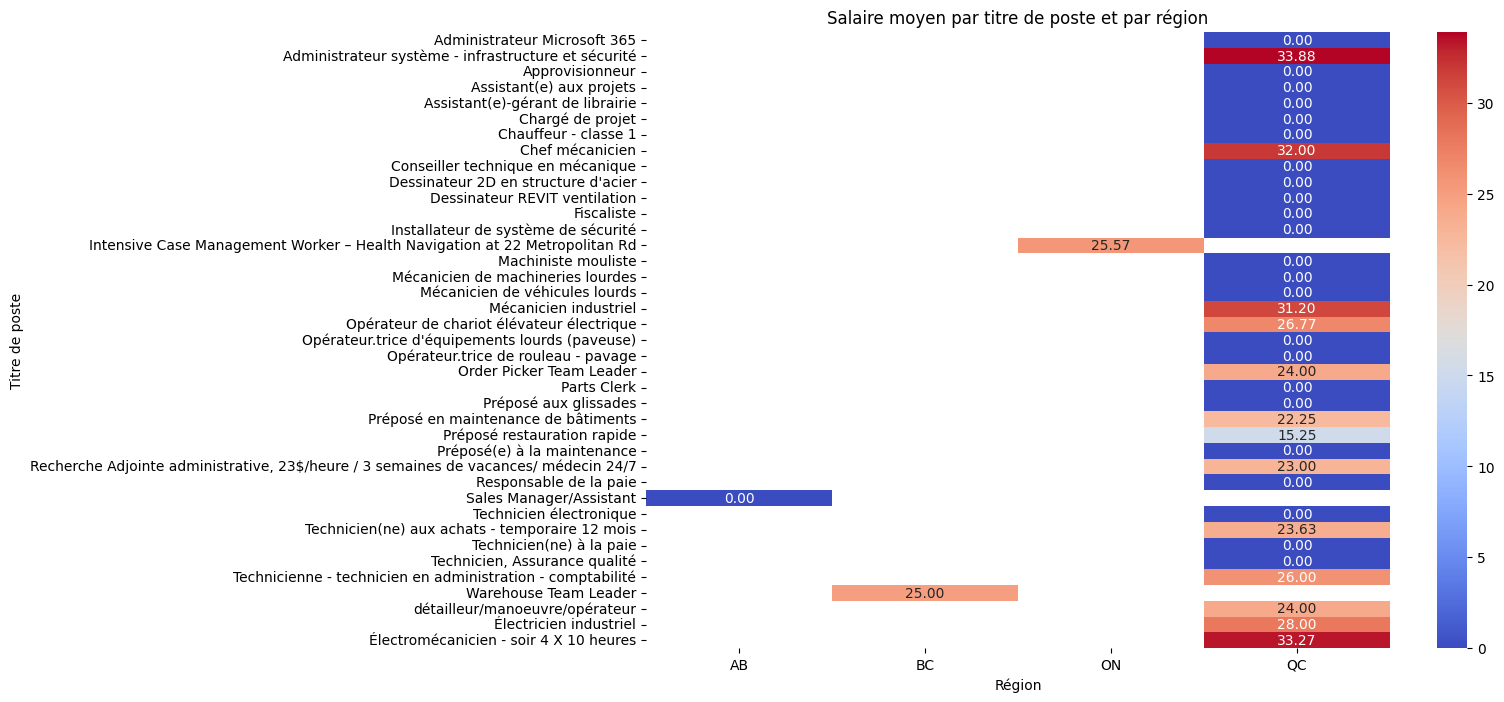

In [86]:
# 6. Faites une visualisation et une analyse des salaires moyen par titre et par région
import matplotlib.pyplot as plt
import seaborn as sns

salaire_moyen = jobs.groupby(['Titres', 'Regions'])['Salaires'].mean().reset_index()

# Pivot table for better visualization
pivot_table = salaire_moyen.pivot('Titres', 'Regions', 'Salaires')

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Salaire moyen par titre de poste et par région')
plt.xlabel('Région')
plt.ylabel('Titre de poste')
plt.show()

On observe que la majorité des postes listés n'ont pas de salaire attribué (indiqué par 0.00), ce qui signifie que ces informations sont manquantes. Cependant, il y a des exceptions où certains postes dans certaines régions ont des salaires moyens indiqués, comme le poste avec un salaire moyen de 33.88 (sans indication de la devise) dans la région 'AB' (Alberta), et plusieurs postes dans la région 'QC' (Québec) avec des salaires allant de 15.25 à 33.27.

L'élément le plus notable est qu'un poste dans la région 'QC' a un salaire moyen significativement plus élevé de 33.27, ce qui se démarque sur la carte. Cela pourrait indiquer un poste hautement spécialisé ou en demande dans cette région.

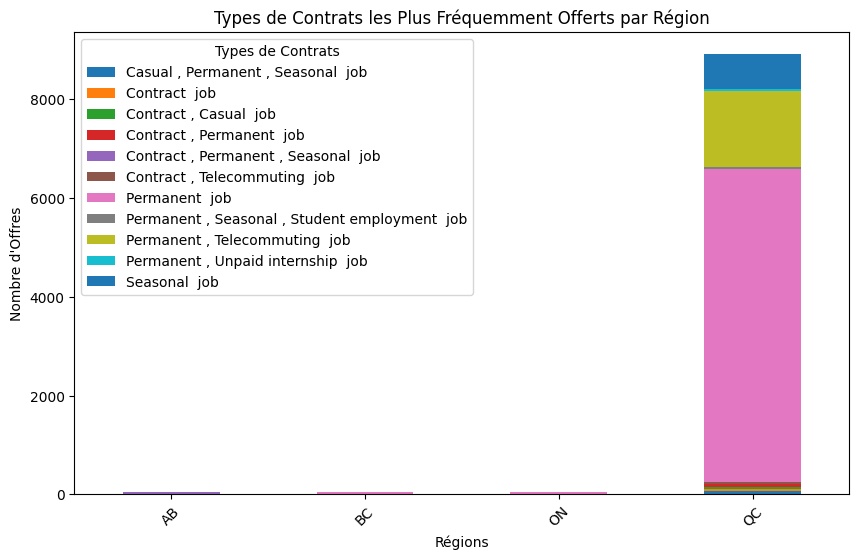

In [69]:
# 7. Visualiser et Analyser les types de contrats les plus fréquemment offerts par région
import matplotlib.pyplot as plt

contrats_par_region = jobs.groupby(['Regions', 'Contrats']).size().unstack().fillna(0)

# Création du graphique en barres empilées
contrats_par_region.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Types de Contrats les Plus Fréquemment Offerts par Région')
plt.xlabel('Régions')
plt.ylabel('Nombre d\'Offres')
plt.xticks(rotation=45)
plt.legend(title='Types de Contrats')
plt.show()


Le graphique montre une répartition variée des types de contrats d'emploi par région, avec une prédominance notable dans la région "QC" pour les stages non rémunérés et le télétravail permanents. Les régions "ON", "AB" et "BC" présentent moins d'offres, avec une tendance pour les contrats permanents en "ON". La diversité des contrats est plus marquée dans les régions ayant un plus grand nombre d'offres, ce qui peut refléter une économie plus diversifiée ou un marché de l'emploi plus grand.

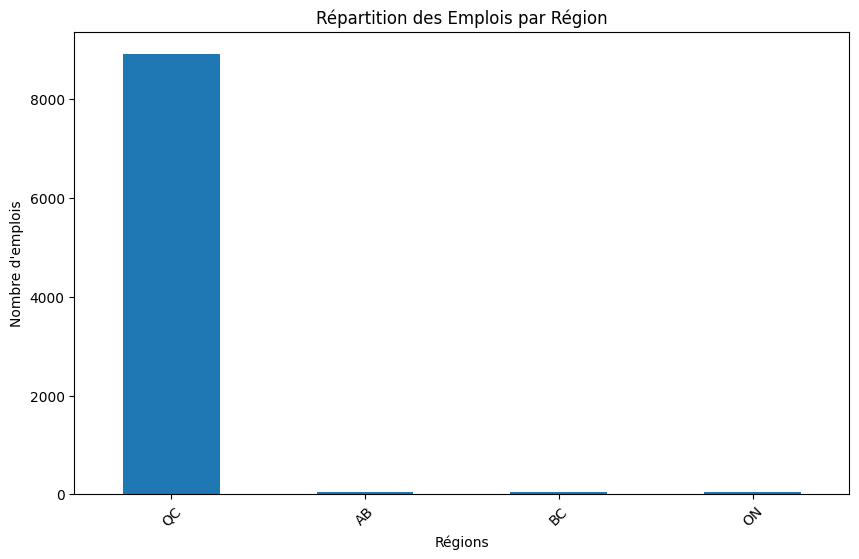

In [95]:
# 8. Visualiser la répartition géographique des emplois
import matplotlib.pyplot as plt

emplois_par_region = jobs['Regions'].value_counts()

# Création du diagramme à barres
plt.figure(figsize=(10, 6))
emplois_par_region.plot(kind='bar')
plt.title('Répartition des Emplois par Région')
plt.xlabel('Régions')  # Ajouter un label pour l'axe des x
plt.ylabel('Nombre d\'emplois')  # Ajouter un label pour l'axe des y
plt.xticks(rotation=45)  # Incliner les étiquettes de l'axe des x pour une meilleure lisibilité
plt.show()


Le graphique montre la répartition des emplois dans quatre régions : Québec (QC), Alberta (AB), Colombie-Britannique (BC), et Ontario (ON). Québec a nettement plus d'emplois que les autres régions, avec plus de 8000 emplois. Les autres régions semblent avoir beaucoup moins d'emplois, mais les chiffres exacts ne sont pas visibles. Cela se produit souvent lorsque la taille de la catégorie dominante éclipse les autres catégories.

<Figure size 1200x800 with 0 Axes>

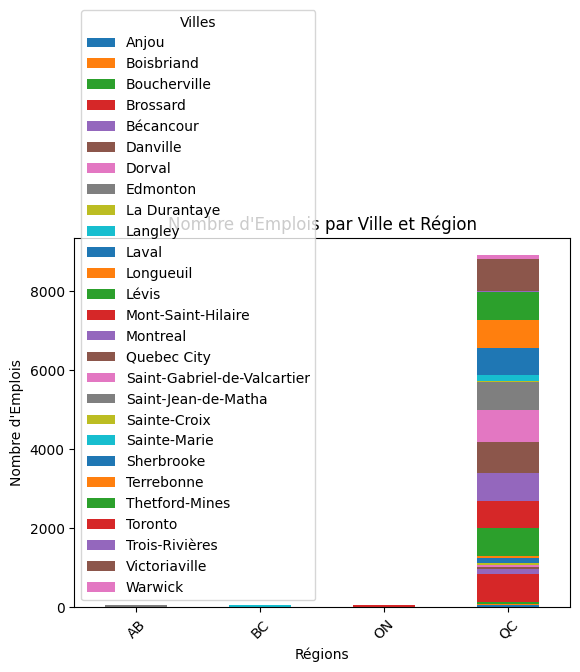

In [75]:
# 9. Faite une visualisation  des nombres d'emplois par ville et région
emplois_par_ville_region = jobs.groupby(['Regions', 'Villes']).size().unstack(fill_value=0)

# Création du graphique
plt.figure(figsize=(12, 8))
emplois_par_ville_region.plot(kind='bar', stacked=True)
plt.title('Nombre d\'Emplois par Ville et Région')
plt.xlabel('Régions')
plt.ylabel('Nombre d\'Emplois')
plt.xticks(rotation=45)
plt.legend(title='Villes')
plt.show()

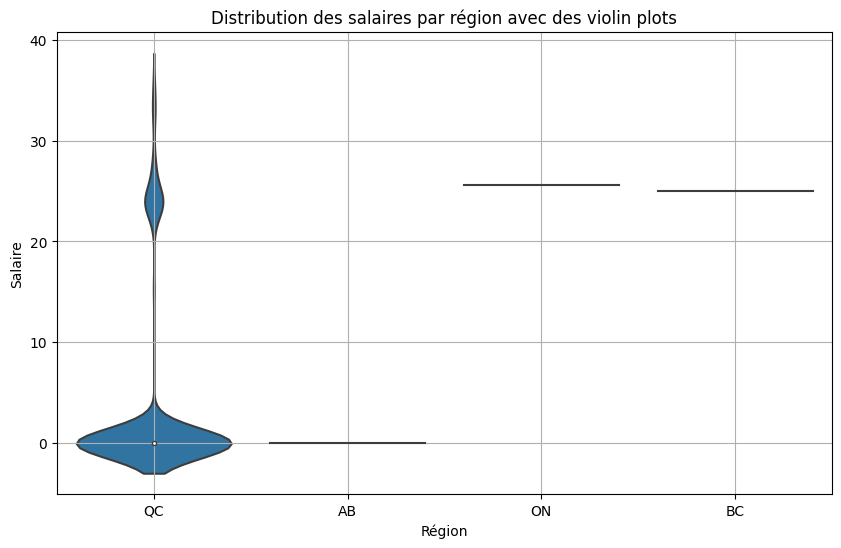

(-0.7003962401282934,
 0.0,
 -0.4980984190680078,
 0.0,
 174.76041904891918,
 3.799318725257234e-110)

In [92]:
# 10. A l’aide d’un graphique, analyser la relation entre la valeur du nombre d'heures travaillers  et le salaire. Y a-t-il un lien quelconque ? Est-ce que la region y joue un role dans cette relation?

from scipy.stats import pearsonr, spearmanr, f_oneway
# Création d'un violin plot sans l'option 'split' pour visualiser la distribution des salaires par région
plt.figure(figsize=(10, 6))
sns.violinplot(data=jobs, x='Regions', y='Salaires')
plt.title('Distribution des salaires par région avec des violin plots')
plt.xlabel('Région')
plt.ylabel('Salaire')
plt.grid(True)
plt.show()

# Calcul du coefficient de corrélation de Pearson
pearson_corr, pearson_pvalue = pearsonr(jobs['Heures'], jobs['Salaires'])

# Calcul du coefficient de corrélation de Spearman
spearman_corr, spearman_pvalue = spearmanr(jobs['Heures'], jobs['Salaires'])

# Préparation des données pour l'ANOVA
# Groupes de salaires par région
groups = [jobs['Salaires'][jobs['Regions'] == region] for region in jobs['Regions'].unique()]

# ANOVA à un facteur pour voir si la région a un effet sur le salaire
anova_stat, anova_pvalue = f_oneway(*groups)

pearson_corr, pearson_pvalue, spearman_corr, spearman_pvalue, anova_stat, anova_pvalue

D'apres le graphique de violon il semble que la région QC ait une distribution de salaire plus variée et un salaire médian inférieur comparé aux autres régions. Les régions AB, ON et BC ont des distributions moins variées, comme indiqué par la minceur de leurs violons, et on ne peut pas distinguer de différence significative dans les médianes de salaire à partir de ce graphique.

L'analyse des coefficients de corrélation indique qu'il existe une tendance générale où le salaire diminue à mesure que le nombre d'heures travaillées augmente, ce qui peut sembler contre-intuitif dans de nombreux contextes de travail. Il serait intéressant d'examiner plus avant les raisons de cette tendance dans les données. Cela pourrait être dû à la présence de travailleurs à temps partiel qui gagnent des salaires horaires plus élevés ou à d'autres facteurs structurels ou économiques.

L'analyse de variance (ANOVA) montre clairement que la région a un effet significatif sur le salaire. Cela pourrait signifier que des facteurs géographiques, économiques, ou des politiques régionales influencent les niveaux de salaire.

# **Partie 3 – Modèle de Régression linéaire**

In [64]:
# 1. Existe t'il une Corrélation entre les nombres d'heures de travail et les salaires
import numpy as np
from scipy.stats import linregress

# Nettoyage des données pour la régression
jobs_cleaned = jobs.dropna(subset=['Salaires', 'Heures'])
slope, intercept, r_value, p_value, std_err = linregress(jobs_cleaned['Heures'], jobs_cleaned['Salaires'])
regression_result = {
    'slope': slope,
    'intercept': intercept,
    'r_value': r_value,
    'p_value': p_value,
    'std_err': std_err
}
print(regression_result)

{'slope': -0.4890900704124664, 'intercept': 21.397036933515604, 'r_value': -0.7003962401282916, 'p_value': 0.0, 'std_err': 0.005238675102077443}



Le résultat de la régression linéaire montre une corrélation négative et statistiquement significative entre les heures de travail et les salaires, indiquant que les salaires diminuent à mesure que le nombre d'heures travaillées augmente. Cependant, cette tendance est contre-intuitive et pourrait nécessiter une investigation plus approfondie pour comprendre les raisons sous-jacentes, comme des facteurs spécifiques à l'industrie ou à la nature des emplois inclus dans votre jeu de données.

In [94]:
# 2. Dans cette question, on s’intéresse à prédire si le salaire d’un emploi sera supérieur ou inférieur a 20$ en fonction de la région, du nombre d'heures travailler, du type dèmplois et du contrat. A l'aide dùn algorithme de régression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Création de la variable cible
jobs['Salaire_sup_20'] = (jobs['Salaires'] > 20).astype(float)

# Prétraitement des données
# Définir les colonnes catégorielles et numériques
cat_features = ['Regions', 'Type Emplois', 'Contrats']
num_features = ['Heures']

# Créer un transformateur de colonnes pour le prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

# Créer un pipeline avec le préprocesseur et le modèle
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Séparation des données
X = jobs[cat_features + num_features]
y = jobs['Salaire_sup_20']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Évaluation du modèle
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

<ipython-input-94-2d03c3759e52>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs['Salaire_sup_20'] = (jobs['Salaires'] > 20).astype(float)


0.9602429596907786
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1504
         1.0       0.93      0.83      0.88       307

    accuracy                           0.96      1811
   macro avg       0.95      0.91      0.93      1811
weighted avg       0.96      0.96      0.96      1811



Le modèle fonctionne très bien, avec une précision élevée et des scores F1 élevés pour les deux classes. Cependant, il est légèrement meilleur pour détecter les salaires ≤ 20$ (classe 0.0) que pour les salaires > 20$ (classe 1.0). Si on veut améliorer davantage les performances, notamment pour la classe 1.0, on pourrais envisager de rééquilibrer l'ensemble des données, d'ajuster les paramètres du modèle, ou d'utiliser des techniques de validation croisée pour une évaluation plus robuste.